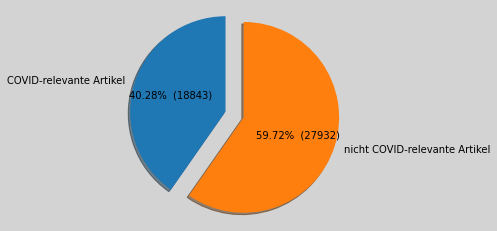

In [1]:
import matplotlib.pyplot as plt

labels = ["COVID-relevante Artikel", "nicht COVID-relevante Artikel"]

prozente = [18843, 46775-18843]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()





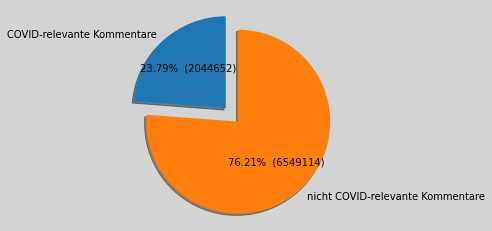

In [2]:
labels = ["COVID-relevante Kommentare", "nicht COVID-relevante Kommentare"]

prozente = [2044652, 8593766-2044652]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()

In [3]:
from collections import Counter

meine_kommentare = Counter()


with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            meine_kommentare[line.split("\t")[4]] += 1
        except IndexError:
            pass

del meine_kommentare["None"]

anzahl = meine_kommentare.values()





In [4]:
# Zählt wie oft ein Kommentar von einem bestimmten User auf einer bestimmten Ebene auftaucht

from collections import defaultdict
node_counter = defaultdict(Counter)
names = [x[0] for x in meine_kommentare.most_common()[:20]]

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[4] in names:
                #print(line.split("\t")[4],line.split("\t")[3]) 
                node_counter[line.split("\t")[4]].update(line.split("\t")[3])
        except IndexError:
            pass

print(node_counter)



defaultdict(<class 'collections.Counter'>, {'mhwse': Counter({'1': 2089, '3': 1582, '2': 1493, '0': 670}), 'Torben-k7b2MJlWR': Counter({'2': 3076, '1': 2784, '3': 2714, '0': 263}), 'HolgerHamburgo': Counter({'1': 2065, '3': 1880, '0': 1367, '2': 1346}), 'Karl-tBDI7C7ZR': Counter({'3': 2052, '2': 1732, '1': 1517, '0': 712}), 'Alwin-hVe4_eMMg': Counter({'1': 3976, '3': 3799, '2': 1136, '0': 178}), 'Knutie': Counter({'3': 6753, '1': 2537, '2': 2160, '0': 24}), 'Jürgen-UYQ1UxHMg': Counter({'1': 2240, '3': 1918, '2': 1165, '0': 109}), 'Engineer': Counter({'3': 1966, '1': 1900, '2': 1472, '0': 384}), 'iris_b': Counter({'3': 7879, '1': 5956, '2': 3852, '0': 1520}), 'Ro_Laren': Counter({'3': 2508, '1': 1372, '2': 1125, '0': 572}), 'Alex-jFlznaUWR': Counter({'1': 2590, '3': 1984, '2': 1216, '0': 227}), 'Tullius': Counter({'3': 8718, '1': 5598, '2': 3595, '0': 1355}), 'HeiterbisWolkig': Counter({'3': 6869, '1': 2675, '2': 1694, '0': 38}), 'Jürgen-SzIee4RMg': Counter({'3': 3869, '1': 3290, '2': 2

In [5]:
# Zählt die Monate der Kommentare, in welchem Monat wurde der Kommentar verfasst und speichert im Dicionary
MonthCounterCOVID = defaultdict(Counter)
MonthCounterNOCOV = defaultdict(Counter)
monthDict={"01":'Jan', "02":'Feb', "03":'Mar', "04":'Apr', "05":'May', "06":'Jun', "07":'Jul', "08":'Aug', "09":'Sep', "10":'Oct', "11":'Nov', "12":'Dec'}
covid_ids = set()

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            covid_ids.add(line.split("\t")[0])
            MonthCounterCOVID[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
            #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass



MonthCounterCOVID



defaultdict(collections.Counter,
            {'20': Counter({'Mar': 99183,
                      'Apr': 156602,
                      'May': 114948,
                      'Jun': 58923,
                      'Jul': 56837,
                      'Aug': 86039,
                      'Sep': 52441,
                      'Oct': 127308,
                      'Nov': 126481,
                      'Dec': 162933,
                      'Feb': 13182,
                      'Jan': 1766}),
             '21': Counter({'Feb': 146887,
                      'Jul': 88865,
                      'Jan': 201770,
                      'Jun': 95462,
                      'Mar': 183305,
                      'Apr': 163084,
                      'May': 106470})})

In [6]:
import pandas as pd
Months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Comment_number_by_month = []
years = []
months = []
for i in range(len(MonthCounterCOVID["20"].values())):
    years.append("20")

for i in range(len(MonthCounterCOVID["21"].values())):
    years.append("21")

for year in MonthCounterCOVID.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month.append(MonthCounterCOVID[year][Months_order[i]])

months.extend(Months_order)
months.extend(Months_order[:7])

del Comment_number_by_month[-5:]

print(Comment_number_by_month)
print(len(months))
print(len(years))
DF_months = pd.DataFrame({"Year": years, "Month": months, "COVID": Comment_number_by_month})

DF_months

[1766, 13182, 99183, 156602, 114948, 58923, 56837, 86039, 52441, 127308, 126481, 162933, 201770, 146887, 183305, 163084, 106470, 95462, 88865]
19
19


,Year,Month,COVID
0,20,Jan,1766
1,20,Feb,13182
2,20,Mar,99183
3,20,Apr,156602
4,20,May,114948
5,20,Jun,58923
6,20,Jul,56837
7,20,Aug,86039
8,20,Sep,52441
9,20,Oct,127308


In [7]:
with open ("alle_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[0] not in covid_ids:
                MonthCounterNOCOV[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
                #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass

MonthCounterNOCOV.items()

dict_items([('20', Counter({'Sep': 345728, 'Nov': 338839, 'Dec': 332476, 'Aug': 321061, 'Oct': 318162, 'Jul': 300807, 'Jun': 241689, 'May': 220849, 'Apr': 156459, 'Feb': 141978, 'Mar': 135286, 'Jan': 66132})), ('21', Counter({'Apr': 443569, 'Mar': 429417, 'Jun': 404149, 'May': 395213, 'Jan': 388380, 'Feb': 350296, 'Jul': 252809, 'Aug': 3}))])

In [8]:
Comment_number_by_month_nocov = []
for year in MonthCounterNOCOV.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month_nocov.append(MonthCounterNOCOV[year][Months_order[i]])
del Comment_number_by_month_nocov[-5:]

DF_months.insert(3, "No COVID", Comment_number_by_month_nocov)



In [9]:
DF_months

,Year,Month,COVID,No COVID
0,20,Jan,1766,66132
1,20,Feb,13182,141978
2,20,Mar,99183,135286
3,20,Apr,156602,156459
4,20,May,114948,220849
5,20,Jun,58923,241689
6,20,Jul,56837,300807
7,20,Aug,86039,321061
8,20,Sep,52441,345728
9,20,Oct,127308,318162


Text(0, 0.5, 'Anzahl der Kommentare')

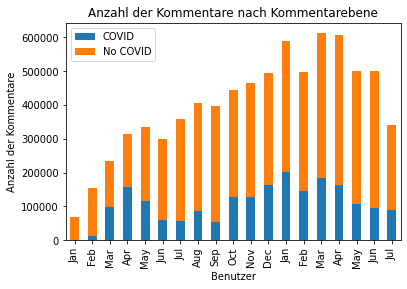

In [10]:
ax = DF_months.plot(kind ="bar",stacked = True, title="Anzahl der Kommentare nach Kommentarebene")
ax.set_xticklabels(DF_months.Month)
ax.set_xlabel("Benutzer")
ax.set_ylabel("Anzahl der Kommentare")

In [11]:
import pandas as pd

,Names,Zeros,Ones,Twos,Threes
11,Tullius,1355,5598,3595,8718
8,iris_b,1520,5956,3852,7879
14,No_Retreat_No_Surrender,408,4097,2385,8181
15,knielang,3700,5164,2233,1924
5,Knutie,24,2537,2160,6753
12,HeiterbisWolkig,38,2675,1694,6869
13,Jürgen-SzIee4RMg,196,3290,2109,3869
4,Alwin-hVe4_eMMg,178,3976,1136,3799
1,Torben-k7b2MJlWR,263,2784,3076,2714
18,Neve,68,2602,1534,3096


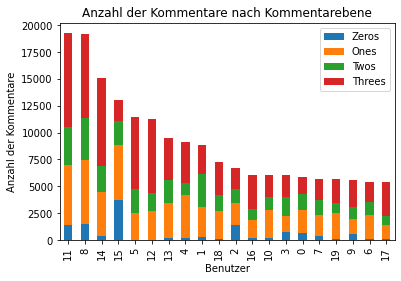

In [12]:
new_names = [x[0] for x in node_counter.items()]
zeros = [x[1]["0"] for x in node_counter.items()]
ones = [x[1]["1"] for x in node_counter.items()]
twos = [x[1]["2"] for x in node_counter.items()]
threes = [x[1]["3"] for x in node_counter.items()]
summe = [a + b +c + d for a,b,c,d in zip(zeros, ones, twos, threes) ]

df = pd.DataFrame({"Names": new_names, "Zeros": zeros, "Ones": ones, "Twos": twos, "Threes": threes, "Sum": summe})

df = df.sort_values("Sum", ascending= False)



del df["Sum"]

ax = df.plot(kind ="bar", stacked = True, title="Anzahl der Kommentare nach Kommentarebene")
ax.set_xlabel("Benutzer")
ax.set_ylabel("Anzahl der Kommentare")

df


In [13]:
# width = 0.35

# fig = plt.figure()
# ax = fig.add_subplot(111)

# ax.barh(names_sorted, zeros_sorted, width, label="0-Kommentar")
# ax.barh(names_sorted, ones_sorted, width, label="1-Kommentar")
# ax.barh(names_sorted, twos_sorted, width, label="2-Kommentar")
# ax.barh(names_sorted, threes_sorted, width, label="3-Kommentar")

# ax.set_ylabel("Anzahl der Kommentare")
# ax.set_title("Anzahl der Kommentare nach Ebene")
# ax.legend()

# plt.show()

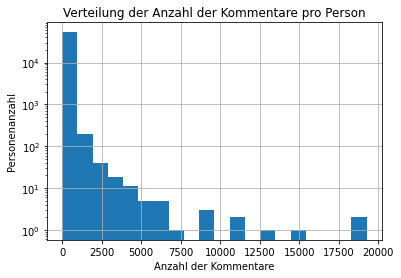

In [14]:
values = meine_kommentare.values()
n, bins, patches = plt.hist(values, bins=20)

plt.xlabel('Anzahl der Kommentare')
plt.ylabel('Personenanzahl')
plt.yscale("log")
plt.title('Verteilung der Anzahl der Kommentare pro Person')
plt.grid(True)
plt.show()

In [15]:
top20 = meine_kommentare.most_common(20)
namen, kommentare = zip(*top20)



In [16]:
import statistics

kommentaremedian = statistics.median(anzahl)
print(f"Median:{kommentaremedian}")
print(f"Mean {statistics.mean(anzahl)}")

Median:3.0
Mean 37.39085750789118


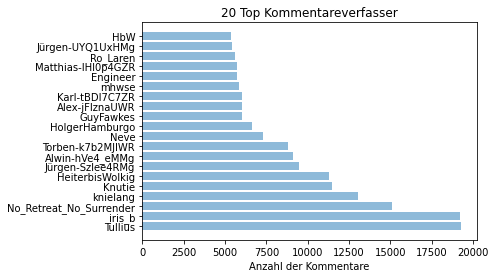

In [17]:
import numpy as np

y_pos = np.arange(len(namen))

plt.barh(y_pos, kommentare, align="center", alpha=0.5)
plt.yticks(y_pos, namen)
plt.xlabel("Anzahl der Kommentare")
plt.title("20 Top Kommentareverfasser")

plt.show()

In [18]:
# Für einen bestimmten User die Kommentare auslesen

def create_user_comments_txt(username: str):

    annotierkommentare = []

    with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
        for line in f:
            try:
                if line.split("\t")[4] == username and line.split("\t")[3] == "0":
                    annotierkommentare.append((line.split("\t")[5], line.split("\t")[1]))
            except IndexError:
                pass

    länge = len(annotierkommentare)

    neuesten_10 = annotierkommentare[:10]
    mittel_10 = annotierkommentare[(länge//2):(länge//2+10)]
    alte_10 = annotierkommentare[-10:]


    with open (username + "_alte_10"  + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in alte_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    
    with open (username + "_mittel_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in mittel_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")

    with open (username + "_neuesten_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in neuesten_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    

In [19]:
#create_user_comments_txt("knielang")
#create_user_comments_txt('Rainer-ppN5YarZg')
create_user_comments_txt('Elektromotor')

In [20]:
list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


'Elektromotor'

In [21]:
sortierte_values = list(meine_kommentare.values())

sortierte_values.sort()

In [22]:
import os
from collections import defaultdict
if os.getcwd() != "c:\\Users\\Kirchner\\Desktop\\Masterarbeit\\Annotieren\\30er Annotationen":    
    cwd = os.getcwd()
    os.chdir(os.path.join(cwd, "Annotieren\\30er Annotationen"))
else:
    pass


example_annotations = defaultdict(list)
for txt_name in os.listdir():
    with open (txt_name, encoding="utf-8", mode = "r") as f:
        for line in f:
            try:
                label = line.split("\t")[2]
                time = line.split("\t")[0]
                if label in ["neutral", "negative", "positive"]:
                    example_annotations[txt_name].append(label)
                else:
                    print(f"This is not correctly annotated: {label, txt_name, time}" )
            except IndexError:
                pass

example_annotations_names = list(example_annotations.keys())


durchsch_alt = Counter(example_annotations[example_annotations_names[0]])
durchsch_mitte = Counter(example_annotations[example_annotations_names[1]])
durchsch_neu = Counter(example_annotations[example_annotations_names[2]])
wenig_alt = Counter(example_annotations[example_annotations_names[3]])
wenig_mitte = Counter(example_annotations[example_annotations_names[4]])
wenig_neu = Counter(example_annotations[example_annotations_names[5]])
viel_alt = Counter(example_annotations[example_annotations_names[6]])
viel_mitte = Counter(example_annotations[example_annotations_names[7]])
viel_neu = Counter(example_annotations[example_annotations_names[8]])



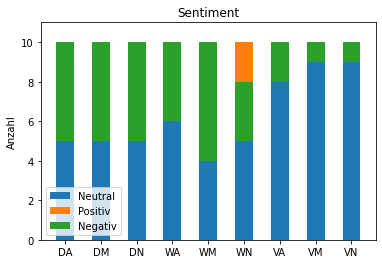

In [23]:
names_example = ["DA", "DM", "DN", "WA", "WM", "WN", "VA", "VM", "VN"]

neutral = [durchsch_alt["neutral"], durchsch_mitte["neutral"], durchsch_neu["neutral"],
           wenig_alt["neutral"], wenig_mitte["neutral"], wenig_neu["neutral"], 
           viel_alt["neutral"], viel_mitte["neutral"], viel_neu["neutral"]]

positive  = [durchsch_alt["positive"], durchsch_mitte["positive"], durchsch_neu["positive"],
           wenig_alt["positive"], wenig_mitte["positive"], wenig_neu["positive"], 
           viel_alt["positive"], viel_mitte["positive"], viel_neu["positive"]]

negative  = [durchsch_alt["negative"], durchsch_mitte["negative"], durchsch_neu["negative"],
           wenig_alt["negative"], wenig_mitte["negative"], wenig_neu["negative"], 
           viel_alt["negative"], viel_mitte["negative"], viel_neu["negative"]] 

width = 0.5

fig, ax = plt.subplots()

ax.bar(names_example, neutral, width, label = "Neutral", bottom=0)
ax.bar(names_example, positive, width, label = "Positiv", bottom=[x+y for x, y in zip(neutral, negative)])
ax.bar(names_example, negative, width, label = "Negativ", bottom=neutral)




ax.set_ylabel('Anzahl')
ax.set_title('Sentiment')
ax.legend()

plt.gca().set_ylim([0,11])
plt.show()


In [24]:
import random


os.chdir("c:\\Users\\Kirchner\\Desktop\\Masterarbeit\\")

with open ("corona_relevante_kommentare", encoding="utf-8", mode = "r+") as f:
    lines = f.readlines()
    random.shuffle(lines)

with open ("shuffled_corona_relevante_kommentare", encoding="utf-8", mode = "w+") as f:
    for line in lines:
        try:
            if line.split("t")[4] != "None" and line.split("\t")[3] == "0":
                f.write(line)
        except IndexError:
            pass
            


    

In [59]:
print(os.getcwd())
with open ("shuffled_corona_relevante_kommentare.txt", encoding="utf-8", mode = "r+") as f:
    for i in range(20):
        print(next(f))

c:\Users\Kirchner\Desktop\Masterarbeit
68232648-390f-479d-b6b6-8887f5e5a926	2020-06-03	12:44	0	Christian-BH-8zc9Wg	Nachtrag: Dieser Artikel ist wirklich enttäuschend. Dass es manchem Leser vielleicht schwerfällt, sich an den Ablauf der Ereignisse zu erinnern, oder diese in einen Kontext zu setzen, okay. Aber der Spiegel? Da könnte man ja wirklich vermuten, das sei Click-Baiting, um Seitenaufrufe zu generieren, oder vom US-Außenministerium abgeschrieben. Wahrscheinlich aber doch einfach nur Naivität und leichte Beeinflussbarkeit der Autoren.

8571cce4-d4d3-4278-b632-50272a6d28a9	2020-03-17	20:25	0	Rainer-Q04T_RlWg	Ein Flugzeug aus China macht noch keinen Frühling. Die Kritik dieses Artikels ist völlig unangebracht. Die EU hat gesundheitspolitisch fast keine Befugnisse. Das ist so gewollt und an sich auch sehr vorteilhaft. Koordinierte politische Aktionen auf europäischer Ebene würden hier gar nicht weiterhelfen. Jede Region in Europa trifft die für sie und der Lage angemessenen Entschei

In [2]:
import webbrowser


annotated_data = []
already_present_data = 0

try:
    with open("annotated_data_training.txt", encoding="utf-8", mode="r+") as y:
        for line in y.readlines():
            if line != "\n":
                already_present_data += 1
except FileNotFoundError:
    already_present_data = 1

print(already_present_data)

with open ("shuffled_corona_relevante_kommentare.txt", encoding="utf-8", mode = "r+") as f:
    done = False
    while done == False:
        for line in f.readlines()[already_present_data-1:]:
            webbrowser.open("https://www.spiegel.de/politik/deutschland/fdp-und-corona-und-pandemie-die-lange-reise-in-die-wirklichkeit-a-" + line.split("\t")[0])
            kommentar = line.split("\t")[5]
            artikel_id = line.split("\t")[0]

            opinion = input(f"Opinion --- {kommentar}")

            while opinion not in ["neutral", "positive", "negative", "exit"]:
                opinion = input(f"Opinion --- {kommentar}")
            if opinion == "exit":
                with open ("annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
                    for line in annotated_data:
                        x.write(line+"\n")
                        done = True
                annotated_data = []
                break
            
            sentiment = input(f"Sentiment --- {kommentar}")

            
            while sentiment not in ["neutral", "positive", "negative"]:
                sentiment = input(f"Sentiment --- {kommentar}")

            
            klasse = input(f"Artikel --- {artikel_id}")

            annotated_data.append(line.split("\t")[0] + "\t" + line.split("\t")[1] + "\t" + line.split("\t")[2] + "\t" + line.split("\t")[3] + "\t" + line.split("\t")[4] + "\t" + opinion + "\t"
                                  + sentiment + "\t" + klasse + "\t" + kommentar + "\n")

        done = True

        klasse = ""
    with open ("annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
                        for line in annotated_data:
                            x.write(line+"\n")
    
    

100


In [6]:
# Sorts out annotations with XXX as label
data = []


with open ("annotated_data_training.txt", encoding = "utf-8", mode ="r+") as f:
    for line in f.readlines():
        if len(line.split("\t")) == 9:
            if line.split("\t")[7] == "XXX":
                pass
            else:
                data.append(line)

with open("cleaned_annotated_data_training.txt", encoding = "utf-8", mode ="w+") as f:
    for line in data:
        f.write(line)